<a href="https://colab.research.google.com/github/Olesya002/ML_course/blob/main/14_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
import math

In [ ]:
%matplotlib inline

# 1. Загрузим изображение и преобразуем в массив пикселей

In [ ]:
from skimage.io import imread
image = imread('parrots.jpg')

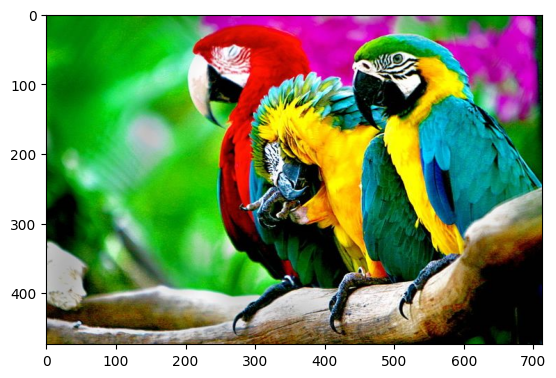

In [ ]:
import pylab
pylab.imshow(image)

In [ ]:
from skimage import img_as_float

In [ ]:
data = img_as_float(image)
data

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21568627, 0.01568627],
        [0.        , 0.20784314, 0.01568627],
        [0.01176471, 0.21568627, 0.03529412]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       ...,

       [[0.4745098 , 0.37647059, 0.02352941],
        [0.45098039, 0.35294118, 0.        ],
        [0.45098039, 0

In [ ]:
data.shape

(474, 713, 3)

# 2. Создадим матрицу объекты - признаки

In [ ]:
data = np.reshape(data, (474*713, 3))
data.shape

(337962, 3)

# 3. Запустим алгоритм K-means. Все пиксели, отнесенные к одному кластеру заполним медианным и средним цветом по кластеру

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(init = 'k-means++', random_state=241, n_clusters = 11)

In [ ]:
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11, random_state=241)

In [ ]:
clusters = kmeans.labels_

In [ ]:
unique_clusters = np.unique(clusters)

In [ ]:
data_median = data.copy()
for i in unique_clusters:
  indexes = np.where(clusters == i)
  temp = np.median(data_median[indexes], axis = 0)
  for j in indexes:
    data_median[j] = temp

In [ ]:
data_mean = data.copy()
for i in unique_clusters:
  indexes = np.where(clusters == i)
  temp = np.mean(data_mean[indexes], axis = 0)
  for j in indexes:
    data_mean[j] = temp

In [ ]:
data_mean.shape
data_mean = np.reshape(data_mean, (474, 713, 3))
data_median = np.reshape(data_median, (474, 713, 3))
data = np.reshape(data, (474, 713, 3))

# 4. Измерим качество сегментации с помощью PSNR

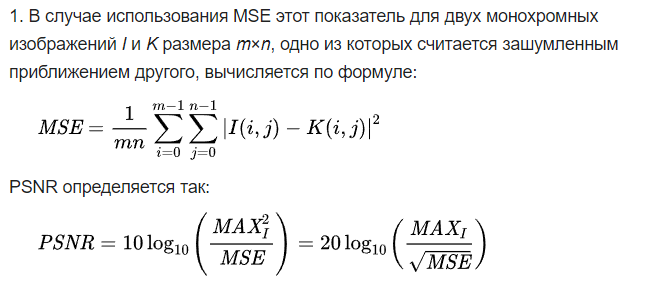

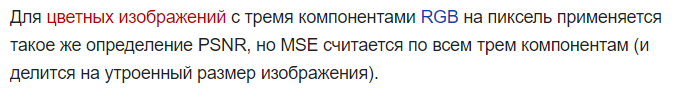

In [ ]:
def MSE(data_1, data_2, index_of_component):
  m, n = data_1.shape[0], data_1.shape[1]
  total = 0
  for i in range(m):
    temp = 0
    for j in range(n):
      temp += abs(data_1[i][j][index_of_component] - data_2[i][j][index_of_component]) ** 2
    total += temp
  return total * (1/(m*n))


In [ ]:
red_mean = MSE(data, data_mean, 0)
green_mean = MSE(data, data_mean, 1)
blue_mean = MSE(data, data_mean, 2)
mse_mean = (red_mean + green_mean + blue_mean) * (1/3)

In [ ]:
psnr_mean = 20 * math.log10(1. / pow(mse_mean, 1/2))
psnr_mean
# 11 clusters минимальное кол-во кластеров, при котором psnr выше 20

20.162160628278045

In [ ]:
red_median = MSE(data, data_median, 0)
green_median = MSE(data, data_median, 1)
blue_median = MSE(data, data_median, 2)
mse_median = (red_median + green_median + blue_median) * (1/3)

In [ ]:
psnr_median = 20 * math.log10(1. / pow(mse_median, 1/2))
psnr_median
# 12 clusters

19.898108909790377